In [17]:
#Import libraries
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno
from fancyimpute import KNN, IterativeImputer
import seaborn as sns

In [18]:
#Load datasets
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
SampleSubmit = pd.read_csv("SampleSubmission.csv")
VarDef = pd.read_csv("VariableDefinitions.csv")
riders = pd.read_csv("Riders.csv")

In [19]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [20]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [21]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [22]:
#Training data including rider information
mergedtrain = pd.merge(train, riders, how = "left", on = 'Rider Id')

## Exploration

In [23]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [24]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [25]:
useless = ["Order No", "User Id", "Vehicle Type", "Placement - Day of Month", "Placement - Weekday (Mo = 1)", 
           "Placement - Time", 'Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
           'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
           'Pickup - Day of Month', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 
           'Arrival at Destination - Time', 'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
             'Destination Long'
           ]

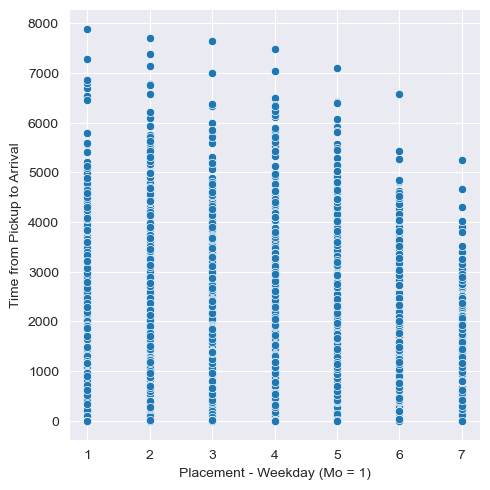

In [26]:
sns.relplot(data=train, x="Placement - Weekday (Mo = 1)",y="Time from Pickup to Arrival")

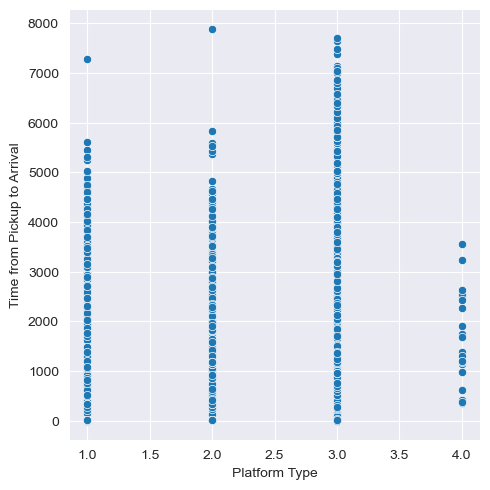

In [27]:
sns.relplot(data=train, x="Platform Type",y="Time from Pickup to Arrival")

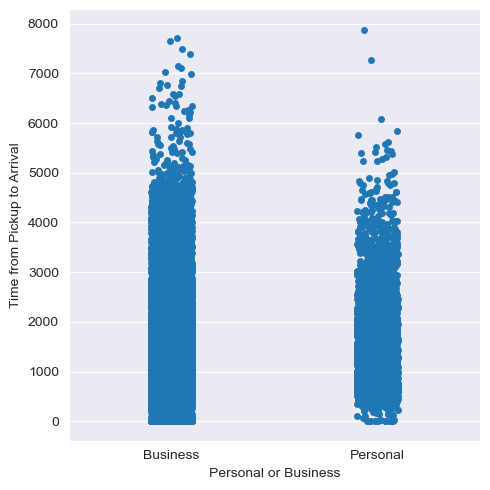

In [28]:
sns.catplot(data=train, x="Personal or Business",y="Time from Pickup to Arrival")

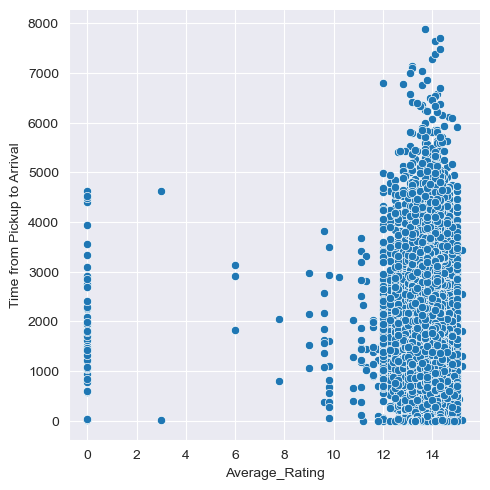

In [29]:
##Do some pairplots
sns.relplot(data=mergedtrain, x="Average_Rating", y="Time from Pickup to Arrival")

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.violinplot(x="Personal or Business", y="Time from Pickup to Arrival", hue="Confirmation - Time", data=mergedtrain, palette="Set3")
plt.title('Arrival Time by Personal or Business, Colored by Day')
plt.xlabel('Personal or Business')
plt.ylabel('Time from Pickup to Arrival')
plt.show()


ValueError: Image size of 861x309663 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 1 Axes>

In [ ]:
clean = pd.read_pickle('clean_training')

In [40]:
mergedtrain['Time from Pickup to Arrival']

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64

In [ ]:
#convert time to seconds since midnight
def settime(time):
    split = time.split(':')
    tempsplit = split[2].split(' ')
    if int(split[0]) != 12:
        seconds = int(split[0])*3600 + int(split[1])*60 + int(tempsplit[0])
    elif tempsplit[1] == 'PM' and int(split[0]) == 12:
        seconds = int(split[0])*3600 + int(split[1])*60 + int(tempsplit[0])
    else:
        seconds = int(split[1])*60 + int(tempsplit[0])
    if tempsplit[1] == 'PM' and int(split[0]) != 12:
        seconds += 43200
    return seconds

In [ ]:

clean['Pickup_time'] = clean["Pickup_time"].apply(settime)

sns.scatterplot(data = clean.sort_values(by = 'Pickup_time'), x = "Pickup_time", y = "Travel_time")

In [ ]:
clean.head()

In [ ]:
clean.to_pickle('clean_training.pkl')

## Cleaning

In [ ]:
train.isnull().sum()

In [ ]:
train.isnull().sum()  /  train.shape[0]

In [ ]:
#Precipitation is mostly empty, so we drop it
mergedtrain = mergedtrain.drop(columns=useless)

In [ ]:
mergedtrain.head()

In [ ]:
mergedtrain.dtypes

In [ ]:
mergedtrain = mergedtrain.reindex(columns=["Rider Id", "No_Of_Orders", 'Age',"Average_Rating","No_of_Ratings", "Platform Type",
                                           "Personal or Business","Pickup - Weekday (Mo = 1)",
                                           "Pickup - Time","Distance (KM)","Temperature","Time from Pickup to Arrival"])

In [ ]:
mergedtrain.head()

In [ ]:
impute = mergedtrain["Temperature"]

In [ ]:
#Changes were lost but clean pickle was made